
# Data  Analysis and Visualization of prisjakt data on sex shops in Sweden
This notebook connects to a local database through sqlite3, and reads data from the 'prisjakt' table, and has some explarotary data analyltics. 


In [18]:
# Importing the stuff we need
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
import numpy as np

In [2]:
#connecting to the database we created using sqlite3 in the pipline and getiing the info of the table
con = sqlite3.connect("db")
df = pd.read_sql_query("select * from prisjakt", con)
df.info()
con.close()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                10000 non-null  int64  
 1   ProductName          10000 non-null  object 
 2   ProductID            10000 non-null  int64  
 3   ProductUrl           10000 non-null  object 
 4   CategoryRank         10000 non-null  int64  
 5   GlobalRank           10000 non-null  int64  
 6   NumberOfShops        10000 non-null  int64  
 7   ShopWithLowestPrice  10000 non-null  object 
 8   Clickable            10000 non-null  int64  
 9   Price                10000 non-null  float64
 10  PriceIncShipping     10000 non-null  float64
 11  Currency             10000 non-null  object 
 12  StockStatus          10000 non-null  object 
dtypes: float64(2), int64(6), object(5)
memory usage: 1015.8+ KB


In [3]:
# Query the data from the database
con = sqlite3.connect("db")
query = "SELECT * FROM prisjakt"
df = pd.read_sql_query(query, con)

# Display the first few rows of the dataframe
df.head()


,index,ProductName,ProductID,ProductUrl,CategoryRank,GlobalRank,NumberOfShops,ShopWithLowestPrice,Clickable,Price,PriceIncShipping,Currency,StockStatus
0,0,Satisfyer Pro 2 Air Pulse Stimulator,4691610,https://www.prisjakt.nu/produkt.php?p=4691610,1,235,42,Mshop.se,1,297.0,346.0,SEK,OUT_OF_STOCK
1,1,Satisfyer Pro 2 Generation 3,8346197,https://www.prisjakt.nu/produkt.php?p=8346197,2,251,28,Lastbryggan,1,389.0,438.0,SEK,IN_STOCK
2,2,Lovense Lush 3,5735419,https://www.prisjakt.nu/produkt.php?p=5735419,3,2183,11,Mshop.se,1,1485.0,1485.0,SEK,IN_STOCK
3,3,Womanizer Premium 2,5906544,https://www.prisjakt.nu/produkt.php?p=5906544,4,2634,20,Lovebox.se,1,1579.0,1579.0,SEK,IN_STOCK
4,4,Satisfyer Pro G-Spot Air Pulse Rabbit,5791994,https://www.prisjakt.nu/produkt.php?p=5791994,5,3180,29,Lovebox.se,1,389.0,438.0,SEK,IN_STOCK


## Data Analysis and Visualization

In [4]:
getting some general info about our data
df.describe()

,index,ProductID,CategoryRank,GlobalRank,NumberOfShops,Clickable,Price,PriceIncShipping
count,10000.00000,1.000000e+04,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,9.185727e+06,5116.746400,1.868397e+06,2.370000,0.903100,574.656270,600.738370
std,2886.89568,2.502830e+06,2971.327846,1.607849e+06,3.001633,0.295836,2149.563034,2148.018823
min,0.00000,4.535362e+06,1.000000,2.350000e+02,1.000000,0.000000,9.000000,49.000000
25%,2499.75000,6.669221e+06,2531.750000,4.454858e+05,1.000000,1.000000,195.990000,228.000000
50%,4999.50000,1.083877e+07,5115.500000,1.312810e+06,1.000000,1.000000,309.000000,348.000000
75%,7499.25000,1.116978e+07,7717.250000,3.932981e+06,2.000000,1.000000,499.000000,548.000000
max,9999.00000,1.201657e+07,10268.000000,4.691723e+06,42.000000,1.000000,115000.000000,115000.000000


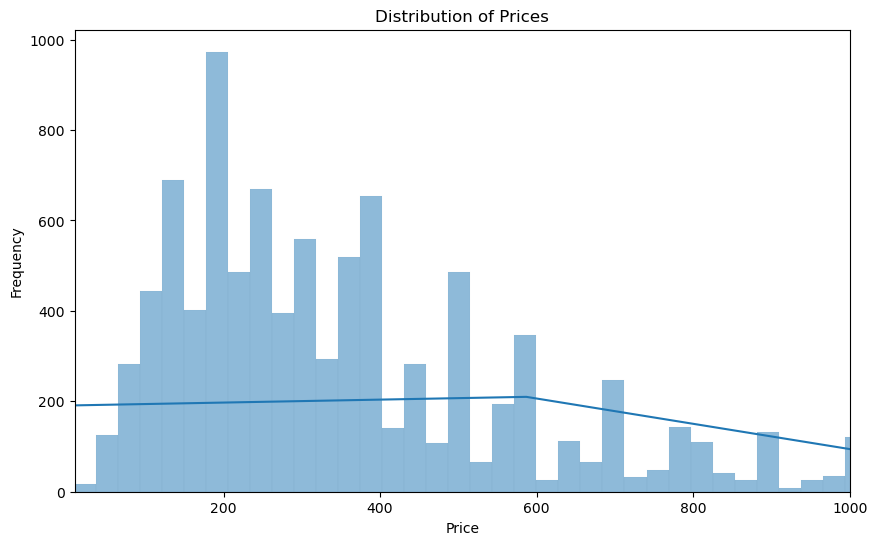

In [43]:
# distribution of the lowsest price per product
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(10, 1000)
#plt.ylim(0,100000)
plt.show()


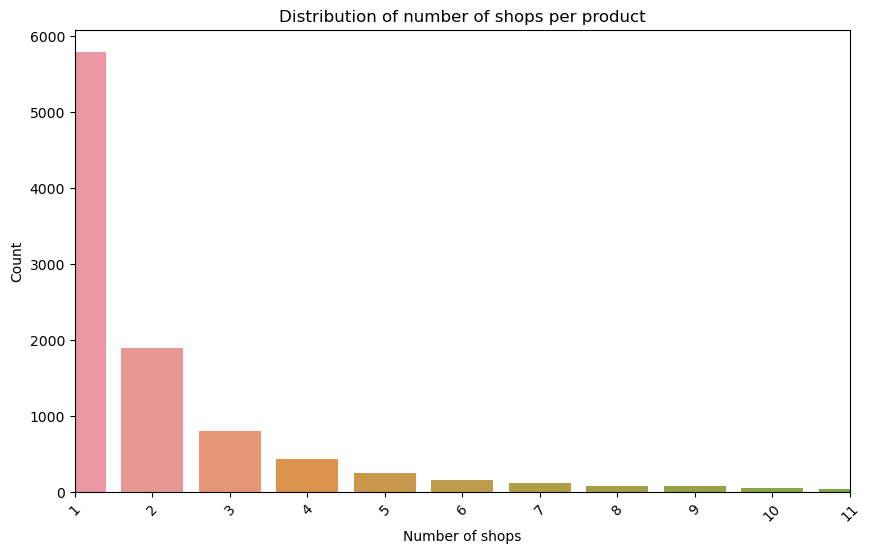

In [15]:
# distribution of the number of shops per product
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NumberOfShops')
plt.title('Distribution of number of shops per product')
plt.xlabel('Number of shops')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.xlim(0,10)
plt.show()

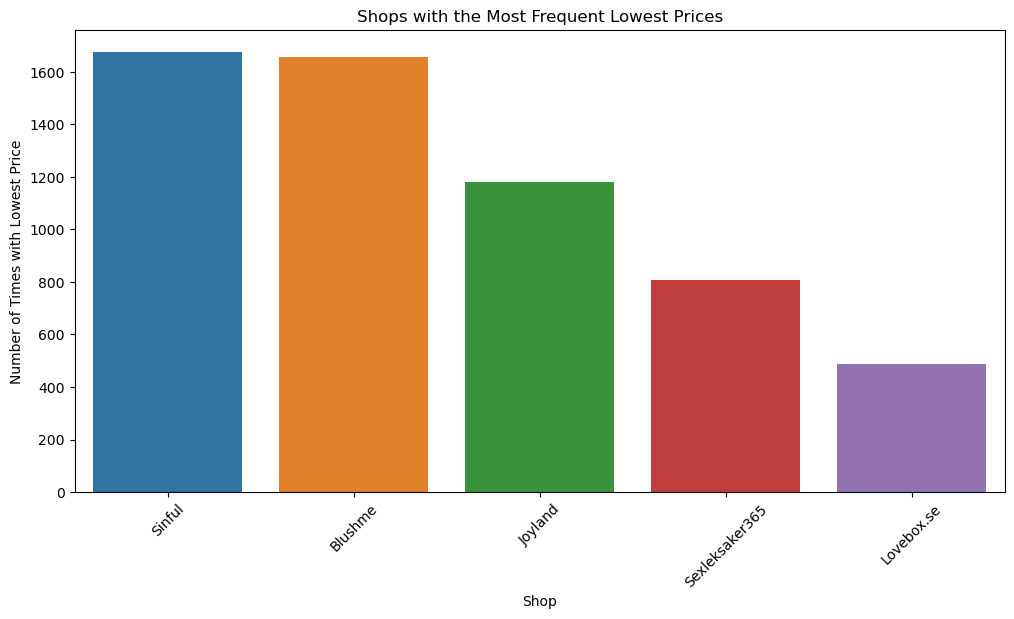

In [23]:
#knowing what shops have the most number of products with the lowest prices
# Count the number of times each shop has the lowest price
lowest_price_counts = df['ShopWithLowestPrice'].value_counts().head(5)

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=lowest_price_counts.index, y=lowest_price_counts.values)
plt.title('Shops with the Most Frequent Lowest Prices')
plt.xlabel('Shop')
plt.ylabel('Number of Times with Lowest Price')
plt.xticks(rotation=45)
plt.show()
